In [ ]:
import pandas as pd
from tabulate import tabulate

# Đọc file CSV (giả sử tên là 'kdd_sample.csv')
df = pd.read_csv('Data/kddcup.data_10_percent.csv')

# In bảng ra terminal cho dễ đọc
print(tabulate(df, headers='keys', tablefmt='pretty'))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     12004
           1       0.99      0.99      0.99     50202

    accuracy                           0.98     62206
   macro avg       0.97      0.97      0.97     62206
weighted avg       0.98      0.98      0.98     62206



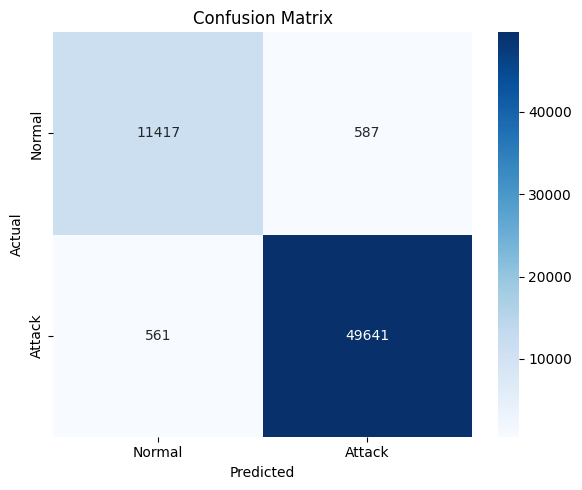

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV (giả sử bạn đã lưu vào 'kdd_sample.csv')
# df = pd.read_csv('kdd_sample.csv')
df = pd.read_csv('Data/kddcup.data_corrected.csv')
# Chuyển đổi nhãn (label) thành binary (0: normal, 1: attack)
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Xác định các cột dạng chuỗi (categorical)
categorical_cols = ['protocol_type', 'service', 'flag']

# Áp dụng OneHot Encoding cho các cột dạng chuỗi
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Chia features và label
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

# Chia thành tập train và test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# In báo cáo đánh giá
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


🔍 ROC-AUC Score: 0.9987


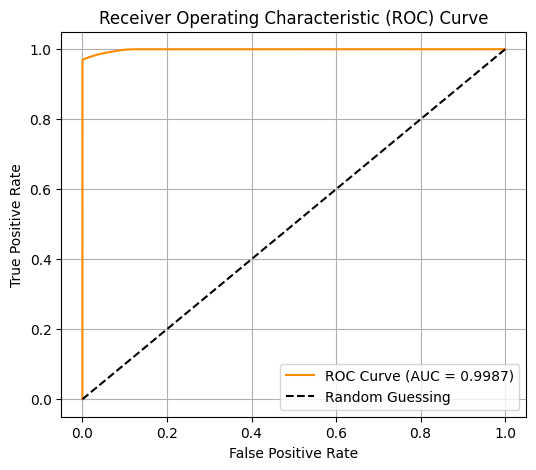

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dự đoán xác suất (xác suất của class 1 - tức "Attack")
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Tính chỉ số ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"🔍 ROC-AUC Score: {roc_auc:.4f}")

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
